C:\Users\qxq1985\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


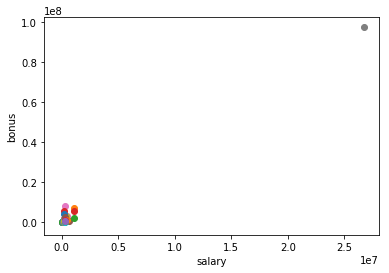

TOTAL


In [1]:
# %load poi_id.py
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from tester import test_classifier

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary','bonus'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    
### Task 2: Remove outliers
import matplotlib.pyplot as plt
data = featureFormat(data_dict, features_list)
for point in data:
    salary=point[1]
    bonus=point[2]
    plt.scatter(salary,bonus)
    
plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()

for key, value in data_dict.items():
    if value['bonus'] == data.max():
        print key
       
data_dict.pop("TOTAL",0)

### Task 3: Create new feature(s)
for i in data_dict:
    person = data_dict[i]
    if (all([person['from_poi_to_this_person'] != 'NaN',person['from_this_person_to_poi'] != 'NaN',person['to_messages'] != 'NaN',person['from_messages'] != 'NaN'])):
        fraction_from_poi = float(person["from_poi_to_this_person"]) / float(person["to_messages"])
        person["fraction_from_poi"] = fraction_from_poi
        fraction_to_poi = float(person["from_this_person_to_poi"]) / float(person["from_messages"])
        person["fraction_to_poi"] = fraction_to_poi
    else:
        person["fraction_from_poi"] = person["fraction_to_poi"] = 0

my_features_list = ['poi','salary','bonus','long_term_incentive','deferred_income','deferral_payments','total_payments','exercised_stock_options','restricted_stock','restricted_stock_deferred','total_stock_value','fraction_from_poi','fraction_to_poi']
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, my_features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)


In [3]:
type(labels)

list

In [4]:
len(labels)

144

In [6]:
sum(labels)

18.0

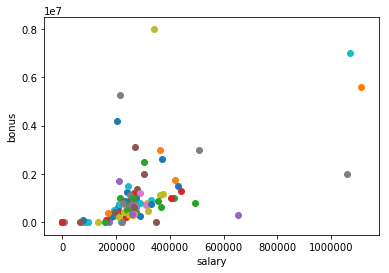

In [53]:
import matplotlib.pyplot as plt

for point in data:
    salary=point[1]
    bonus=point[2]
    plt.scatter(salary,bonus)
    
plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()

In [13]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
pca.fit_transform(features)
pca.explained_variance_ratio_
#n=2

array([  7.90181112e-01,   1.64856450e-01,   1.99246216e-02,
         1.01101602e-02,   7.32937146e-03,   4.28014808e-03,
         2.07746544e-03,   1.06996431e-03,   1.12390967e-04,
         5.83165845e-05,   2.06153327e-16,   6.38784948e-18])

In [18]:
# from sklearn.feature_selection import SelectKBest
# selector = SelectKBest(k='all').fit(features,labels)
# selector.transform(features) 
# selector.scores_
# #k=7
# #salary,bonus,exercised_stock_options,total_stock_value,fraction_to_poi

array([ 18.57570327,  21.06000171,  10.07245453,  11.59554766,
         0.21705893,   8.86672154,  25.09754153,   9.34670079,
         0.06498431,  24.46765405,   3.21076192,  16.64170707])

In [54]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

pca = PCA(n_components=2)
selector = SelectKBest(k=7)
combined_features= FeatureUnion([("pca", pca), ("univ_select", selector)])
combined_features.fit(features,labels).transform(features)

array([[  1.15621931e+06,  -2.33683413e+06,   2.01955000e+05, ...,
          1.72954100e+06,   1.72954100e+06,   2.96127563e-02],
       [ -3.77764247e+06,  -1.17031325e+06,   0.00000000e+00, ...,
          2.57817000e+05,   2.57817000e+05,   0.00000000e+00],
       [  9.38193304e+05,   3.30837355e+06,   4.77000000e+02, ...,
          4.04615700e+06,   5.24348700e+06,   0.00000000e+00],
       ..., 
       [ -4.02276336e+06,  -1.18180838e+06,   0.00000000e+00, ...,
          1.39130000e+05,   1.39130000e+05,   0.00000000e+00],
       [  5.70188528e+06,   9.74719810e+06,   1.58403000e+05, ...,
          8.30855200e+06,   1.18847580e+07,   0.00000000e+00],
       [ -3.93372061e+06,  -1.15902877e+06,   0.00000000e+00, ...,
          1.92758000e+05,   1.92758000e+05,   0.00000000e+00]])

In [55]:
# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
pipe_nb=Pipeline([("features", combined_features),('clf',GaussianNB())])
test_classifier(pipe_nb, my_dataset, my_features_list)

Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('univ_select', SelectKBest(k=7, score_func=<function f_classif at 0x000000000A36A5F8>))],
       transformer_weights=None)), ('clf', GaussianNB(priors=None))])
	Accuracy: 0.84840	Precision: 0.41046	Recall: 0.31400	F1: 0.35581	F2: 0.32949
	Total predictions: 15000	True positives:  628	False positives:  902	False negatives: 1372	True negatives: 12098



In [56]:
from sklearn.linear_model import LogisticRegression
pipe_lgr=Pipeline([('sc',StandardScaler()),("features", combined_features),('clf',LogisticRegression())])
test_classifier(pipe_lgr, my_dataset, my_features_list)

Pipeline(steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('univ_select', SelectKBest(k=7, score_...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])
	Accuracy: 0.85533	Precision: 0.40116	Recall: 0.17250	F1: 0.24126	F2: 0.19470
	Total predictions: 15000	True positives:  345	False positives:  515	False negatives: 1655	True negatives: 12485



In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
tree = DecisionTreeClassifier()
pipe_tree=Pipeline([("features", combined_features),('clf',tree)])
test_classifier(pipe_tree, my_dataset, my_features_list)

Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('univ_select', SelectKBest(k=7, score_func=<function f_classif at 0x000000000A36A5F8>))],
       transfo...it=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))])
	Accuracy: 0.80480	Precision: 0.27671	Recall: 0.28750	F1: 0.28200	F2: 0.28527
	Total predictions: 15000	True positives:  575	False positives: 1503	False negatives: 1425	True negatives: 11497



In [58]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
pipe_rfc=Pipeline([("features", combined_features),('clf',forest)])
test_classifier(pipe_rfc, my_dataset, my_features_list)

Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('univ_select', SelectKBest(k=7, score_func=<function f_classif at 0x000000000A36A5F8>))],
       transfo...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])
	Accuracy: 0.85327	Precision: 0.37262	Recall: 0.14700	F1: 0.21083	F2: 0.16725
	Total predictions: 15000	True positives:  294	False positives:  495	False negatives: 1706	True negatives: 12505



In [59]:
from sklearn.ensemble import VotingClassifier
clf1=GaussianNB()
clf2=tree
clf3=forest
vc = VotingClassifier(estimators=[('gnb',clf1),('tr',clf2),('fr',clf3)])
pipe_vc=Pipeline([("features", combined_features),('clf',vc)])
test_classifier(pipe_vc, my_dataset, my_features_list)

Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('univ_select', SelectKBest(k=7, score_func=<function f_classif at 0x000000000A36A5F8>))],
       transfo...=None,
            verbose=0, warm_start=False))],
         n_jobs=1, voting='hard', weights=None))])
	Accuracy: 0.84867	Precision: 0.37094	Recall: 0.19400	F1: 0.25476	F2: 0.21446
	Total predictions: 15000	True positives:  388	False positives:  658	False negatives: 1612	True negatives: 12342



In [46]:
pipe_nb.get_params().keys()

['features__transformer_list',
 'features__pca__tol',
 'features__univ_select__k',
 'features',
 'features__pca__copy',
 'clf__priors',
 'clf',
 'features__pca__random_state',
 'features__univ_select__score_func',
 'features__univ_select',
 'features__pca__svd_solver',
 'steps',
 'features__pca__whiten',
 'features__transformer_weights',
 'features__pca',
 'features__pca__n_components',
 'features__pca__iterated_power',
 'features__n_jobs']

In [60]:
param_grid=[{"features__univ_select__k":range(1,10)}]
gs=GridSearchCV(estimator=pipe_nb,param_grid=param_grid,scoring="f1",cv=10)
gs.fit(features,labels)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('univ_select', SelectKBest(k=7, score_func=<function f_classif at 0x000000000A36A5F8>))],
       transformer_weights=None)), ('clf', GaussianNB(priors=None))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'features__univ_select__k': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [61]:
gs.best_params_

{'features__univ_select__k': 9}

In [62]:
combined_features= FeatureUnion([("pca", PCA(n_components=2)), ("univ_select", SelectKBest(k=9))])
combined_features.fit(features,labels).transform(features)
pipe_nb_best=Pipeline([("features", combined_features),('clf',GaussianNB())])
test_classifier(pipe_nb_best, my_dataset, my_features_list)

Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('univ_select', SelectKBest(k=9, score_func=<function f_classif at 0x000000000A36A5F8>))],
       transformer_weights=None)), ('clf', GaussianNB(priors=None))])
	Accuracy: 0.85533	Precision: 0.45023	Recall: 0.38450	F1: 0.41478	F2: 0.39607
	Total predictions: 15000	True positives:  769	False positives:  939	False negatives: 1231	True negatives: 12061



In [63]:
# pipe_tree.get_params().keys()

param_grid=[{"features__univ_select__k":range(1,10),"clf__max_depth":range(1,10),"clf__min_samples_split":range(2,20,1)}]
gs=GridSearchCV(estimator=pipe_tree,param_grid=param_grid,scoring="f1",cv=10)
gs.fit(features,labels)
print gs.best_params_

{'clf__max_depth': 4, 'clf__min_samples_split': 9, 'features__univ_select__k': 1}


In [64]:
combined_features= FeatureUnion([("pca", PCA(n_components=2)), ("univ_select", SelectKBest(k=1))])
combined_features.fit(features,labels).transform(features)
tree_best = DecisionTreeClassifier(max_depth=4,min_samples_split=9)
pipe_tree_best=Pipeline([("features", combined_features),('clf',tree_best)])
test_classifier(pipe_tree_best, my_dataset, my_features_list)

Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('univ_select', SelectKBest(k=1, score_func=<function f_classif at 0x000000000A36A5F8>))],
       transfo...it=9, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))])
	Accuracy: 0.85047	Precision: 0.41328	Recall: 0.28950	F1: 0.34049	F2: 0.30795
	Total predictions: 15000	True positives:  579	False positives:  822	False negatives: 1421	True negatives: 12178



In [65]:

### Task 5: Tune your classifier to achieve better than .3 precision and recall
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
# from sklearn.cross_validation import train_test_split
# features_train, features_test, labels_train, labels_test = \
#      train_test_split(features, labels, test_size=0.3, random_state=42)

# ### Task 6: Dump your classifier, dataset, and features_list so anyone can
# ### check your results. You do not need to change anything below, but make sure
# ### that the version of poi_id.py that you submit can be run on its own and
# ### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(pipe_nb_best, my_dataset, my_features_list)